# Finanzas Compuacionales

# Juan Esteban Acosta

# Taller #3

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import cvxpy as cp
!pip install yfinance
import yfinance as yf
!pip install fitter
from fitter import Fitter, get_common_distributions, get_distributions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=5d6615a228eae6fd9217bf9fa8b48b25807da11ca863181613bb685fb75756e4
  Stored in directory: /root/.cache/pip/wheels/40/65/62/57b872ba7af36e70111b1f67cffe76f97c747804aff7665ccb
Successfully built fitter


1. Escoja una acción de su preferencia. Con la información histórica para el periodo Ene-
2016 a Dic-2021, estime los parámetros μ y σ.

a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

St = St−1 exp{(μ– 1/2σ
2
)dt + σ dWt
}

Donde: Wt es un proceso estándar de Wiener. Presente gráficamente las primeras 20
trayectorias del proceso para un tiempo de un año (T=1).

b. Presente los histogramas de los precios y retornos al final del periodo (T=1).

c. Demuestre que el valor terminal del precio simulado de la acción converge a
ST exp{(μ– 1/2σ
2
)}.

d. Calcule la probabilidad de que los retornos de la acción sean inferiores a cero.



In [2]:
activos = ["AAPL"]
precios = yf.download(activos,start="2016-01-01",end="2021-12-31")
precios = precios.loc[:,"Adj Close"].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
sigma = retornos.std()

[*********************100%***********************]  1 of 1 completed


a. Con estos parámetros construya 10.000 trayectorias del precio que sigan el proceso
estocástico:

In [3]:
def PathsGBM(S0,mu,sigma,T,NS,M):    
    Z = np.random.normal(0.0,1.0,[NS,M])
    S = np.zeros([NS, M+1])
    S[:,0] = S0
    dt = T / M
    for t in range(0,M):
        S[:,t+1] = S[:,t] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) *Z[:,t])
    St = S # {"S":S} 
    return St

In [4]:
T = 5
S0 = 100
NS = 10000
M = 252
St = PathsGBM(S0,mu,sigma,T,NS,M)
St

array([[100.        , 100.39712031, 100.33869944, ..., 103.05661971,
        102.45771464, 102.24990187],
       [100.        , 100.03575656,  99.82158163, ..., 102.41322413,
        102.53070953, 102.65784483],
       [100.        , 100.147404  ,  99.65847037, ..., 103.43696424,
        103.77242427, 103.50513662],
       ...,
       [100.        ,  99.94666671, 100.14009395, ..., 101.10412659,
        101.26993758, 101.23127115],
       [100.        , 100.55583963, 100.50283137, ...,  95.52810073,
         95.92846044,  95.98585704],
       [100.        , 100.49588362, 100.34191558, ..., 103.90436005,
        103.66661075, 103.45768877]])

Text(0, 0.5, 'S(t)')

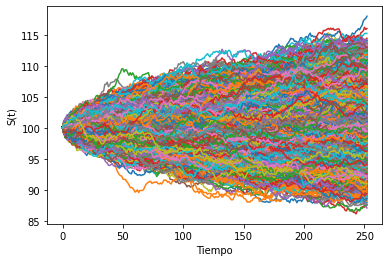

In [6]:
plt.plot(np.transpose(St)) 
plt.xlabel("Tiempo")
plt.ylabel("S(t)")

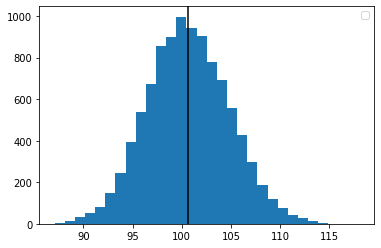

In [7]:
plt.hist(St[:,-1], bins=30)
plt.axvline(St[:,-1].mean(), color='black')
plt.legend()

2. Con las acciones de: JPM, MCD, META, WMT

a. Construir el portafolio de mínima varianza global de Markowitz. Presentar el grafico de
pesos y sus medidas de retorno esperado y volatilidad

b. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
estándar o paramétrico

c. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de estimación histórica

d. Calcular el VaR del portafolio para los niveles de confianza del 95% y 99%. Usar el modelo
de simulación

In [8]:
start = '2010-12-31'
end = '2021-12-31'
# Tickers of assets
assets = ['JPM','MCD','META','WMT']
precios = yf.download(assets, start = start, end = end,interval='1Mo')['Adj Close'].dropna()
retornos = np.log(precios/precios.shift(1)).dropna()
mu = retornos.mean()
cov = retornos.cov()
var = np.diag(cov)
sigma = np.sqrt(var)
n = len(mu)

[*********************100%***********************]  4 of 4 completed


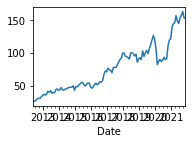

In [20]:
plt.subplot(2, 2, 1)
precios['JPM'].plot()

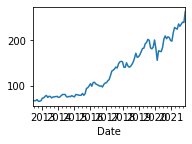

In [11]:
plt.subplot(2, 2, 2)
precios['MCD'].plot()

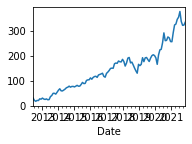

In [12]:
plt.subplot(2, 2, 3)
precios['META'].plot()

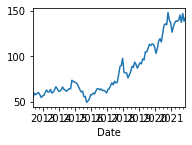

In [13]:
plt.subplot(2, 2, 4)
precios['WMT'].plot()

(array([ 1.,  0.,  3.,  4., 17., 27., 38., 16.,  6.,  2.]),
 array([-0.25439512, -0.2096028 , -0.16481047, -0.12001815, -0.07522583,
        -0.0304335 ,  0.01435882,  0.05915114,  0.10394347,  0.14873579,
         0.19352811]),
 <a list of 10 Patch objects>)

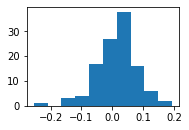

In [14]:
plt.subplot(2, 2, 1)
plt.hist(retornos['JPM'],bins=10)

(array([ 1.,  0.,  3.,  7., 14., 37., 28., 14.,  8.,  2.]),
 array([-0.15443138, -0.12595149, -0.0974716 , -0.06899172, -0.04051183,
        -0.01203194,  0.01644795,  0.04492784,  0.07340773,  0.10188761,
         0.1303675 ]),
 <a list of 10 Patch objects>)

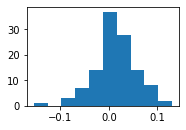

In [15]:
plt.subplot(2, 2, 2)
plt.hist(retornos['MCD'],bins=10)

(array([ 1.,  0.,  2., 15., 38., 37., 15.,  4.,  1.,  1.]),
 array([-0.35943489, -0.28434804, -0.20926119, -0.13417435, -0.0590875 ,
         0.01599935,  0.0910862 ,  0.16617305,  0.24125989,  0.31634674,
         0.39143359]),
 <a list of 10 Patch objects>)

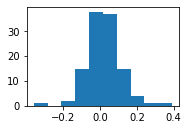

In [16]:
plt.subplot(2, 2, 3)
plt.hist(retornos['META'],bins=10)

(array([ 1.,  1.,  2., 11., 21., 24., 31., 15.,  5.,  3.]),
 array([-0.1691628 , -0.13846496, -0.10776712, -0.07706928, -0.04637144,
        -0.0156736 ,  0.01502424,  0.04572208,  0.07641991,  0.10711775,
         0.13781559]),
 <a list of 10 Patch objects>)

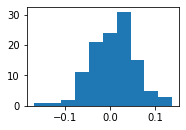

In [17]:
plt.subplot(2, 2, 4)
plt.hist(retornos['WMT'],bins=10)

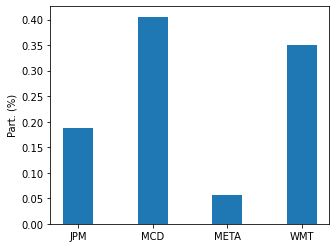

In [18]:
def pmvg(cov, ones):  
    cov_inv = np.linalg.inv(cov)  
    w = np.dot(cov_inv, ones)  #pesos de
    return w / np.sum(w) 

unos = np.repeat(1,n)
wpmvg = pmvg(cov, unos)

fig = plt.figure(figsize = (5, 4))
plt.bar(assets, wpmvg, width = 0.4)
plt.ylabel("Part. (%)")
plt.show()

3. Con la información de los registros de pérdidas de la entidad TuDeuda Ltda:

a. Realizar un análisis exploratorio de los datos (media, desviación, curtosis, simetría).
Apoye su análisis con gráficos (histogramas y QQplot).

b. ¿Qué puede decir de la distribución de los datos de pérdidas de la entidad?

c. Ajuste diferentes funciones de distribución de probabilidad a los datos. ¿Qué distribución
recomienda?

d. Si la frecuencia de los eventos de perdidas sigue una distribución Binomial con parámetros
N=12 y p=0.2, calcule la perdida esperada.

4. Escoja dos activos que presenten un comportamiento de reversión a la media tipo OU.

a. Construya la gráfica de las series históricas de los precios y/o valores

b. Presente los resultados de las pruebas de estacionariedad de Dickey-Fuller (ADF)

c. Construya 100 trayectorias o simulaciones para cada activo con periodicidad mensual y
con duración T=1.

In [23]:
activos = ["AAPL"]
data = yf.download(activos,start="2010-01-01",end="2021-12-31")
precios3 = data.loc[:,"Adj Close"].dropna()
retornos3 = np.log(precios3/precios3.shift(1)).dropna()
mu3 = retornos.mean()
sigma3 = retornos.std()

[*********************100%***********************]  1 of 1 completed


In [24]:
import statsmodels.api as sm
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

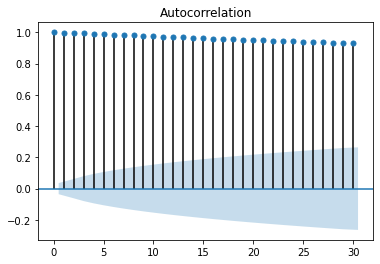

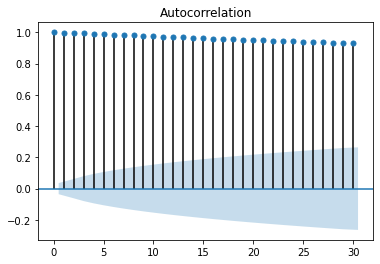

In [25]:
plot_acf(precios3, lags=30)